In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import metrics

In [48]:
#read csv
df = pd.read_csv('winequality-white.csv', delimiter=';')
#copy to ln_df make sure we don't change the orginal dataframe
ln_df = df[['alcohol','quality']].copy()
ln_df

,alcohol,quality
0,8.8,6
1,9.5,6
2,10.1,6
3,9.9,6
4,9.9,6
...,...,...
4893,11.2,6
4894,9.6,5
4895,9.4,6
4896,12.8,7


In [49]:
#size of all data
print(len(ln_df))

4898


In [50]:
ln_df.index

RangeIndex(start=0, stop=4898, step=1)

In [51]:
#create dataframe containing random sample from lin_df row  that take 25% for test
ln_holdout = ln_df.sample(frac=0.20)
ln_holdout.index

Index([1626, 1231, 4505, 1611, 3681, 1065, 4748, 2311, 3840, 4046,
       ...
        574,  547, 3535, 4018, 2188,  579, 3005, 3030, 4129,  857],
      dtype='int64', length=980)

In [52]:
#take the rest
ln_training = ln_df.loc[~ln_df.index.isin(ln_holdout.index)]
ln_training.index

Index([   0,    1,    3,    4,    5,    6,    8,   10,   11,   12,
       ...
       4884, 4885, 4886, 4887, 4888, 4890, 4892, 4893, 4894, 4895],
      dtype='int64', length=3918)

In [53]:
x_train = ln_training[['alcohol']]
y_train = ln_training['quality']

In [54]:
# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [55]:
x_test = ln_holdout[['alcohol']]
y_test = ln_holdout['quality']

In [56]:
y_pred = model.predict(x_test)

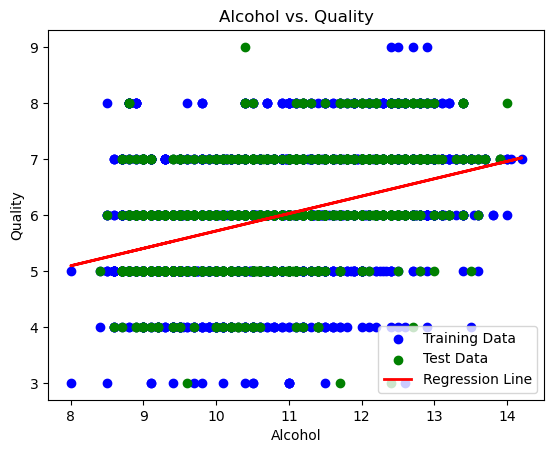

In [71]:

# Plotting the training data
plt.scatter(x_train, y_train, color='blue', label='Training Data')
# Plotting the test data
plt.scatter(x_test, y_test, color='green', label='Test Data')

# Plotting the regression line
plt.plot(x_train, model.predict(x_train), color='red', linewidth=2, label='Regression Line')

plt.xlabel('Alcohol')
plt.ylabel('Quality')
plt.legend()
plt.title('Alcohol vs. Quality')

# Show the plot
plt.show()

In [70]:
# Model parameters
intercept = model.intercept_
coefficient = model.coef_[0]

# Model evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)

# Print results
print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")
print(f"RMSE: {rmse}")
print(f"R²: {r_squared}")

Intercept: 2.604771552382731
Coefficient: 0.3108566570462425
RMSE: 0.7941035696679305
R²: 0.2044432675435599
